<a href="https://colab.research.google.com/github/gustapfp/desafio_bix/blob/master/desafio_bix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns

dataset2020 = pd.read_csv('base_vigente_2020.csv')
dataset_anos_anteriores = pd.read_csv('base_vigente_anos_anteriores.csv', sep=';')

mapa_dataset = {
    'class':'ventilacao',
}


dataset2020 = dataset2020.rename(columns = mapa_dataset)
dataset2020 = dataset2020.replace(['neg', 'pos'], [False, True])
dataset2020

,ventilacao,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,...,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,False,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,...,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,False,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,...,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,False,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,...,46,3413978,2924,414,0,0,60,38710,0,0,0,0,27740,33354,6330,0,0,133542,21290,2718360,435370,0,0,0,0,1179900,1541.32,1678,659550,691580,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,False,1814,na,156,140,0,0,0,0,0,0,72,17926,82834,3114,0,0,48978,0,0,0,0,0,97146,89920,12932,5092,0,0,0,0,102,50,0,0,0,0,0,11544,73570,...,0,95372,78,36,0,0,0,0,0,0,0,0,538,360,142,0,0,1822,344,2140,394,13664,110,0,0,813740,113.86,52,10216,9958,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,False,81852,na,2130706432,892,0,0,0,0,0,0,5486,704012,3220278,1297498,76170,7206,2276100,0,0,0,0,0,4547950,3779700,973592,669608,0,0,1536,0,6374,1194,0,0,0,0,0,214014,3876498,...,12,4521542,4596,1006,0,0,0,0,0,0,0,0,40386,58588,23628,0,0,155596,23350,7124860,724280,30954,6854,0,0,10074490,1546.74,2054,883900,983308,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,False,18,0,52,46,8,26,0,0,0,0,6444,3308,2720,0,0,0,3740,0,0,0,1150,2790,14656,12242,7222,1338,0,0,0,0,66,96,0,0,0,0,0,0,0,...,0,3962,104,66,0,0,0,0,0,0,0,0,264,0,0,32,8,106,28,3500,340,11108,8,0,0,0,0.98,50,9354,2746,266,44,46,14,2,0,0,0,0,0
15997,False,79636,na,1670,1518,0,0,0,0,0,0,15062,1991298,2768440,329148,13124,990,2156280,0,0,0,0,0,4562338,3828492,1238380,578006,0,0,1828,0,8044,1130,0,0,0,0,0,1686138,3101858,...,42,4728848,5108,456,0,0,0,0,0,0,0,0,40850,114166,18210,0,0,187506,29150,439500,51928,952030,7626,0,0,715020,3644.6,3982,450380,1073658,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,False,110,na,36,32,0,0,0,0,0,0,198,3730,27418,978,0,0,12790,0,0,0,0,0,26026,13504,61018,6160,0,0,0,0,22,66,0,0,0,0,0,0,0,...,0,12768,198,38,0,0,0,0,0,0,0,0,602,0,0,15122,2018,380,66,0,0,83504,100,0,0,0,133.84,130,22688,5698,588,210,180,544,1004,1338,74,0,0,0


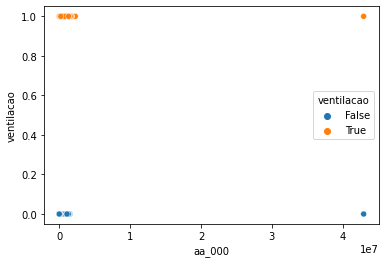

In [77]:
sns.scatterplot(x='aa_000', y='ventilacao', data=dataset2020, hue='ventilacao')

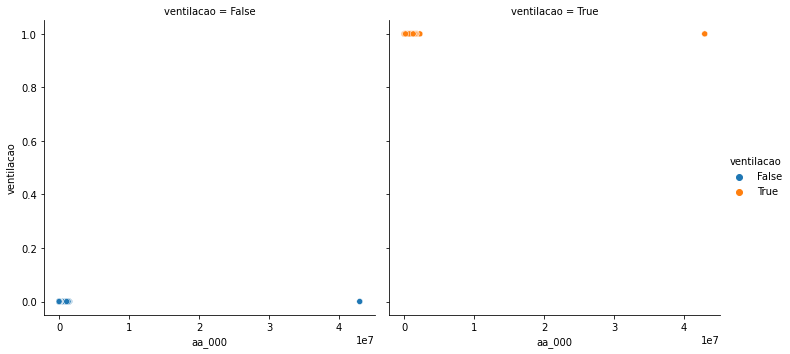

In [79]:
sns.relplot(x='aa_000', y='ventilacao', data=dataset2020, col='ventilacao', hue='ventilacao')

In [76]:
select2020 = dataset2020.ventilacao == True
pos2020 = dataset2020[select2020]
pos2020 

,ventilacao,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
42,True,1800546,na,na,13042,na,na,0,280,132164,7875494,55386332,92749198,52130878,16496844,1901366,28480,82073576,196142,0,na,986196,1957344,149868570,115528598,84129814,34558772,na,0,0,0,na,na,0,0,0,0,0,0,0,...,0,72195158,na,na,na,na,na,na,na,na,na,na,1948124,na,na,na,na,na,na,na,na,na,na,na,na,na,51833.9,40332,95928594,50515302,30997662,7611880,9706814,7087194,24679144,121822,52624,0,na,na
100,True,715316,na,na,na,0,0,0,0,0,0,81318,5510544,20428832,4250614,17578,0,6850130,69078,92,0,308,646,14658390,11575474,7849632,2456312,0,0,13972,0,0,0,0,0,0,0,0,520220,16030084,...,na,na,56488,1620,na,na,na,na,na,na,na,na,206472,563262,138524,0,0,1707222,213276,60959720,22363100,0,0,0,0,na,0.36,0,3703656,5965794,3905674,1753622,3247762,2700712,2902338,2787064,3187202,135060,0,0
426,True,1055714,na,na,na,0,0,0,0,0,130,196186,10992134,41971684,13090340,141034,468,22822190,24374,56,na,570,1710,54813266,48131824,14718716,5591650,0,0,624,0,0,0,0,0,0,0,0,566136,29340102,...,na,na,102,6,na,na,na,na,na,na,na,na,426200,1860,500,0,0,6398,740,476860,133450,0,0,0,0,na,18371.36,22968,8667474,11120294,7651830,3968726,9587618,8521170,6513690,3988408,6064958,307808,0,0
428,True,27304,2,512,486,0,0,0,0,0,576480,1880082,263386,26422,320,0,0,971460,0,222,0,98112,156756,1834630,1314632,903962,573986,0,0,0,0,3542,1370,0,0,0,0,0,0,0,...,0,2023602,6390,3202,919660,608692,0,0,0,0,0,0,24468,14428,4356,4519524,635628,91582,13124,9225120,928912,1844974,4034,0,0,4274980,814.64,738,863860,716650,241924,99820,216566,203724,226244,170430,7472,0,0,0
434,True,1520540,na,na,na,0,0,0,0,0,60,383930,13556044,62966486,19296738,230176,2084,33015288,361312,0,na,1524,5296,76926138,63718684,25353220,10913962,na,0,14542,0,0,0,0,0,0,0,0,315174,38158622,...,na,na,72078,na,na,na,na,na,na,na,na,na,676712,na,na,na,na,na,na,na,na,na,na,na,na,na,33025.84,47946,8629518,18241104,12830228,7287542,21196940,12907126,7005504,3584098,4639484,113974,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15736,True,174400,na,na,na,na,na,0,30432,301722,1614422,3847088,6039172,2556012,331228,12984,0,4460298,23348,0,na,784356,1440144,10046356,8927408,4712292,1649210,na,0,0,0,na,na,0,0,0,0,0,0,96846,...,na,na,na,na,na,na,na,na,na,na,na,na,89402,na,na,na,na,na,na,na,na,na,na,na,na,na,5554.06,3802,5620592,1334084,1105644,520758,1176256,1385890,1601694,1923956,64186,0,na,na
15783,True,527262,na,3982,34,0,0,0,98,72942,888868,1344580,1951248,688230,30082,482,0,14437978,21504,0,na,2770720,4550980,24103474,22199662,8177560,3786620,4,0,0,0,5738,644,0,0,0,0,0,0,46512,...,0,4026938,20156,2250,na,na,na,na,na,na,na,na,300258,131766,43430,23139572,2694552,151598,203484,2273700,249996,34650240,84886,0,0,na,1236.18,1534,997834,583176,416132,190852,487218,736134,1490982,74140,62,0,6,36
15799,True,756860,na,0,na,0,0,0,0,0,8494,921526,11909556,25483544,8669816,315228,9488,23475558,53592,0,0,22586,46376,40305792,33900812,9000474,5478870,0,0,4530,0,0,0,0,0,0,0,0,113870,11486258,...,na,na,22116,1166,0,0,0,2,0,0,0,0,396180,568620,85962,0,0,1045640,171280,38844760,10131620,0,0,0,0,486861400,16511.04,21412,4326498,9164044,6855960,3362408,7018398,6221124,4553774,2362834,3218640,233972,0,0
15955,

In [111]:
model = SVC()
SEED = 5

x = dataset2020[['aa_000']]
y = dataset2020[['ventilacao']]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=SEED)

model.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
predictions = model.predict(x_teste)

In [93]:
acy_sre = accuracy_score(y_teste, predictions)
print(f"A precisão do modelo foi de: {(acy_sre)*100}")

A precisão do modelo foi de: 97.975


In [116]:
base_predictions = np.ones(4000, dtype=bool)
#print(f'Tamanho base:{len(base_predictions)} // Tamanho teste y:{len(y_teste)} ')
base_line_acy_sre = accuracy_score(y_teste, base_predictions)
print(f"A precisão da linha de base foi de: {(base_line_acy_sre)*100}")

A precisão da linha de base foi de: 2.3
